## 1. Import Libraries and Load Data
This block imports the necessary libraries, sets visualization preferences, and loads the TikTok and Forest App datasets. It also checks for missing values and inspects data types.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display  # For cleaner table display in Jupyter

# Set up visualization settings
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size for all plots

# Load datasets
try:
    tiktok_data = pd.read_csv("tiktok_data.csv")
    forest_data = pd.read_csv("forest_app_data.csv")
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading datasets: {e}")

# Display the first few rows of each dataset with wider rows and columns
print("\nTikTok Data (Sample):")
display(tiktok_data.head().style.set_caption("TikTok Data")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:90%; table-layout:fixed;"'))

print("\nForest App Data (Sample):")
display(forest_data.head().style.set_caption("Forest App Data")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:90%; table-layout:fixed;"'))

# Check for missing values in both datasets
print("\nChecking for missing values:")
print("TikTok Data Missing Values:\n", tiktok_data.isnull().sum())
print("Forest Data Missing Values:\n", forest_data.isnull().sum())

# Inspect data types and basic info
print("\nTikTok Data Info:")
tiktok_data.info()

print("\nForest App Data Info:")
forest_data.info()


Datasets loaded successfully!

TikTok Data (Sample):


,Date,TotalScreenTime,DayScreenTime,NightScreenTime,TotalLogCount,DayLogCount,NightLogCount
0,03-11-2024,127,54,33,11,5,6
1,04-11-2024,132,103,29,17,16,1
2,05-11-2024,101,21,80,9,5,4
3,06-11-2024,189,113,76,17,12,5
4,07-11-2024,119,97,22,12,8,4



Forest App Data (Sample):


,Date,TotalFocusTime(mins),NumberofFocusSessions,Math306,Cs210,cs305,cs404,cs412,Cs307
0,03-11-2024,423,8,0,213,0,0,0,210
1,04-11-2024,96,3,0,0,0,0,0,96
2,05-11-2024,351,5,0,0,0,0,0,351
3,06-11-2024,172,7,0,86,0,0,0,86
4,07-11-2024,398,9,0,0,0,0,0,398



Checking for missing values:
TikTok Data Missing Values:
 Date               0
TotalScreenTime    0
DayScreenTime      0
NightScreenTime    0
TotalLogCount      0
DayLogCount        0
NightLogCount      0
dtype: int64
Forest Data Missing Values:
 Date                     0
TotalFocusTime(mins)     0
NumberofFocusSessions    0
Math306                  0
Cs210                    0
cs305                    0
cs404                    0
cs412                    0
Cs307                    0
dtype: int64

TikTok Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             67 non-null     object
 1   TotalScreenTime  67 non-null     int64 
 2   DayScreenTime    67 non-null     int64 
 3   NightScreenTime  67 non-null     int64 
 4   TotalLogCount    67 non-null     int64 
 5   DayLogCount      67 non-null     int64 
 6   NightLogCo

## 2. Clean and Merge the Data
This block ensures the date format in both datasets is consistent, removes invalid dates, and merges the datasets on the `Date` column. It also checks for missing values in the merged dataset.


In [11]:
from IPython.display import display  # Import for better table display

# Clean and ensure proper date format in TikTok Data
if 'Date' in tiktok_data.columns:
    if not pd.api.types.is_string_dtype(tiktok_data['Date']):
        tiktok_data['Date'] = tiktok_data['Date'].astype(str)  # Convert to string if not already
    tiktok_data['Date'] = tiktok_data['Date'].str.strip()  # Remove extra spaces
    tiktok_data['Date'] = pd.to_datetime(tiktok_data['Date'], format='%d-%m-%Y', errors='coerce')

# Clean and ensure proper date format in Forest Data
if 'Date' in forest_data.columns:
    if not pd.api.types.is_string_dtype(forest_data['Date']):
        forest_data['Date'] = forest_data['Date'].astype(str)  # Convert to string if not already
    forest_data['Date'] = forest_data['Date'].str.strip()  # Remove extra spaces
    forest_data['Date'] = pd.to_datetime(forest_data['Date'], format='%d-%m-%Y', errors='coerce')

# Check for null dates in both datasets
print("\nChecking for null or invalid dates:")
display(tiktok_data[tiktok_data['Date'].isnull()].style.set_caption("TikTok Data - Null Dates")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:90%; table-layout:fixed;"'))
display(forest_data[forest_data['Date'].isnull()].style.set_caption("Forest App Data - Null Dates")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:90%; table-layout:fixed;"'))

# Drop rows with null dates
tiktok_data = tiktok_data.dropna(subset=['Date'])
forest_data = forest_data.dropna(subset=['Date'])

# Merge datasets on the Date column
merged_data = pd.merge(tiktok_data, forest_data, on='Date', how='inner')

# Display the first few rows of the merged dataset with adjusted widths
print("\nMerged Data (Sample):")
display(merged_data.head(10).style.set_caption("Merged Data")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:95%; table-layout:fixed;"'))

# Check for missing values in the merged dataset
print("\nMerged Data - Missing Values:")
display(merged_data.isnull().sum().to_frame(name="Missing Values")
        .style.set_caption("Missing Values in Merged Data")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:50%; table-layout:fixed;"'))



Checking for null or invalid dates:


,Date,TotalScreenTime,DayScreenTime,NightScreenTime,TotalLogCount,DayLogCount,NightLogCount


,Date,TotalFocusTime(mins),NumberofFocusSessions,Math306,Cs210,cs305,cs404,cs412,Cs307



Merged Data (Sample):


,Date,TotalScreenTime,DayScreenTime,NightScreenTime,TotalLogCount,DayLogCount,NightLogCount,TotalFocusTime(mins),NumberofFocusSessions,Math306,Cs210,cs305,cs404,cs412,Cs307
0,2024-11-03 00:00:00,127,54,33,11,5,6,423,8,0,213,0,0,0,210
1,2024-11-04 00:00:00,132,103,29,17,16,1,96,3,0,0,0,0,0,96
2,2024-11-05 00:00:00,101,21,80,9,5,4,351,5,0,0,0,0,0,351
3,2024-11-06 00:00:00,189,113,76,17,12,5,172,7,0,86,0,0,0,86
4,2024-11-07 00:00:00,119,97,22,12,8,4,398,9,0,0,0,0,0,398
5,2024-11-08 00:00:00,85,21,64,9,5,4,369,6,0,0,0,0,0,369
6,2024-11-09 00:00:00,29,0,29,3,1,2,472,8,0,104,0,0,0,368
7,2024-11-10 00:00:00,75,40,35,9,5,4,250,5,0,182,0,0,0,68
8,2024-11-11 00:00:00,120,75,45,15,9,6,100,3,0,0,0,0,100,0
9,2024-11-12 00:00:00,85,22,63,11,4,7,305,8,0,0,0,0,305,0



Merged Data - Missing Values:


,Missing Values
Date,0
TotalScreenTime,0
DayScreenTime,0
NightScreenTime,0
TotalLogCount,0
DayLogCount,0
NightLogCount,0
TotalFocusTime(mins),0
NumberofFocusSessions,0
Math306,0


## 3. Perform Descriptive Statistics
This block computes descriptive statistics for the TikTok, Forest App, and merged datasets, displaying them in organized tables.


In [12]:
# Descriptive statistics for TikTok Data
print("\nDescriptive Statistics for TikTok Data:")
tiktok_description = tiktok_data.describe().transpose()  # Transpose for better readability
display(tiktok_description.style.set_caption("Descriptive Statistics for TikTok Data")
        .background_gradient(cmap="Blues")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:95%; table-layout:fixed;"'))

# Descriptive statistics for Forest App Data
print("\nDescriptive Statistics for Forest App Data:")
forest_description = forest_data.describe().transpose()  # Transpose for better readability
display(forest_description.style.set_caption("Descriptive Statistics for Forest App Data")
        .background_gradient(cmap="Greens")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:95%; table-layout:fixed;"'))

# Descriptive statistics for Merged Data
print("\nDescriptive Statistics for Merged Data:")
merged_description = merged_data.describe().transpose()  # Transpose for better readability
display(merged_description.style.set_caption("Descriptive Statistics for Merged Data")
        .background_gradient(cmap="Oranges")
        .set_table_styles([{'selector': 'th, td', 'props': [('padding', '12px')]}])
        .set_table_attributes('style="width:95%; table-layout:fixed;"'))



Descriptive Statistics for TikTok Data:


,count,mean,min,25%,50%,75%,max,std
Date,67,2024-12-06 00:00:00,2024-11-03 00:00:00,2024-11-19 12:00:00,2024-12-06 00:00:00,2024-12-22 12:00:00,2025-01-08 00:00:00,nan
TotalScreenTime,67.000000,122.835821,29.000000,89.500000,120.000000,149.000000,255.000000,47.288155
DayScreenTime,67.000000,65.253731,0.000000,40.000000,62.000000,82.500000,185.000000,32.481857
NightScreenTime,67.000000,56.552239,3.000000,35.000000,56.000000,72.000000,182.000000,30.829091
TotalLogCount,67.000000,13.522388,3.000000,10.000000,13.000000,17.000000,25.000000,4.746157
DayLogCount,67.000000,8.402985,1.000000,6.000000,8.000000,10.500000,18.000000,3.563535
NightLogCount,67.000000,5.119403,0.000000,3.000000,5.000000,7.000000,12.000000,2.782643



Descriptive Statistics for Forest App Data:


,count,mean,min,25%,50%,75%,max,std
Date,67,2024-12-06 00:00:00,2024-11-03 00:00:00,2024-11-19 12:00:00,2024-12-06 00:00:00,2024-12-22 12:00:00,2025-01-08 00:00:00,nan
TotalFocusTime(mins),67.000000,256.880597,0.000000,153.500000,278.000000,368.500000,539.000000,133.512288
NumberofFocusSessions,67.000000,4.880597,0.000000,3.000000,5.000000,6.500000,9.000000,2.427883
Math306,67.000000,45.611940,0.000000,0.000000,0.000000,0.000000,389.000000,104.827124
Cs210,67.000000,20.208955,0.000000,0.000000,0.000000,0.000000,234.000000,53.225517
cs305,67.000000,66.149254,0.000000,0.000000,0.000000,118.000000,495.000000,107.552137
cs404,67.000000,51.014925,0.000000,0.000000,0.000000,14.000000,468.000000,111.463201
cs412,67.000000,44.850746,0.000000,0.000000,0.000000,10.000000,355.000000,92.696843
Cs307,67.000000,29.044776,0.000000,0.000000,0.000000,0.000000,398.000000,92.277978



Descriptive Statistics for Merged Data:


,count,mean,min,25%,50%,75%,max,std
Date,67,2024-12-06 00:00:00,2024-11-03 00:00:00,2024-11-19 12:00:00,2024-12-06 00:00:00,2024-12-22 12:00:00,2025-01-08 00:00:00,nan
TotalScreenTime,67.000000,122.835821,29.000000,89.500000,120.000000,149.000000,255.000000,47.288155
DayScreenTime,67.000000,65.253731,0.000000,40.000000,62.000000,82.500000,185.000000,32.481857
NightScreenTime,67.000000,56.552239,3.000000,35.000000,56.000000,72.000000,182.000000,30.829091
TotalLogCount,67.000000,13.522388,3.000000,10.000000,13.000000,17.000000,25.000000,4.746157
DayLogCount,67.000000,8.402985,1.000000,6.000000,8.000000,10.500000,18.000000,3.563535
NightLogCount,67.000000,5.119403,0.000000,3.000000,5.000000,7.000000,12.000000,2.782643
TotalFocusTime(mins),67.000000,256.880597,0.000000,153.500000,278.000000,368.500000,539.000000,133.512288
NumberofFocusSessions,67.000000,4.880597,0.000000,3.000000,5.000000,6.500000,9.000000,2.427883
Math306,67.000000,45.611940,0.000000,0.000000,0.000000,0.000000,389.000000,104.827124


# Time Series Analysis for Total Screen Time and Total Focus Time

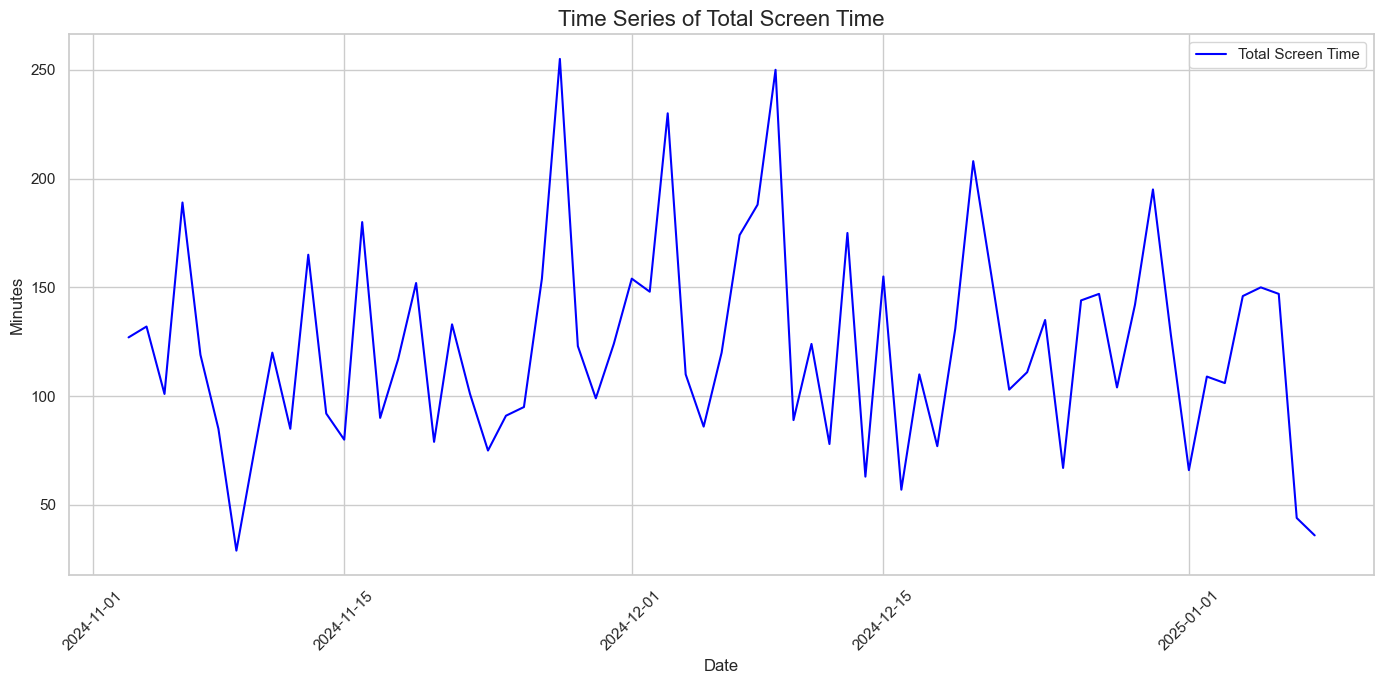

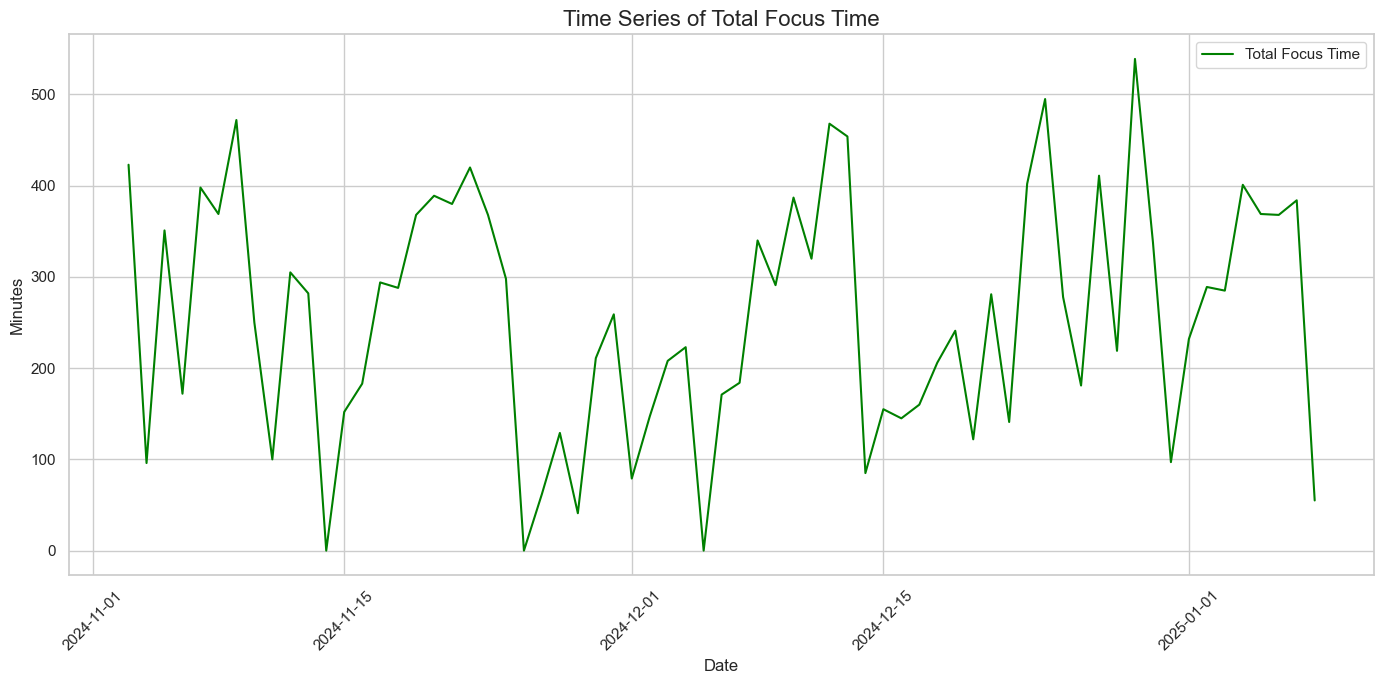

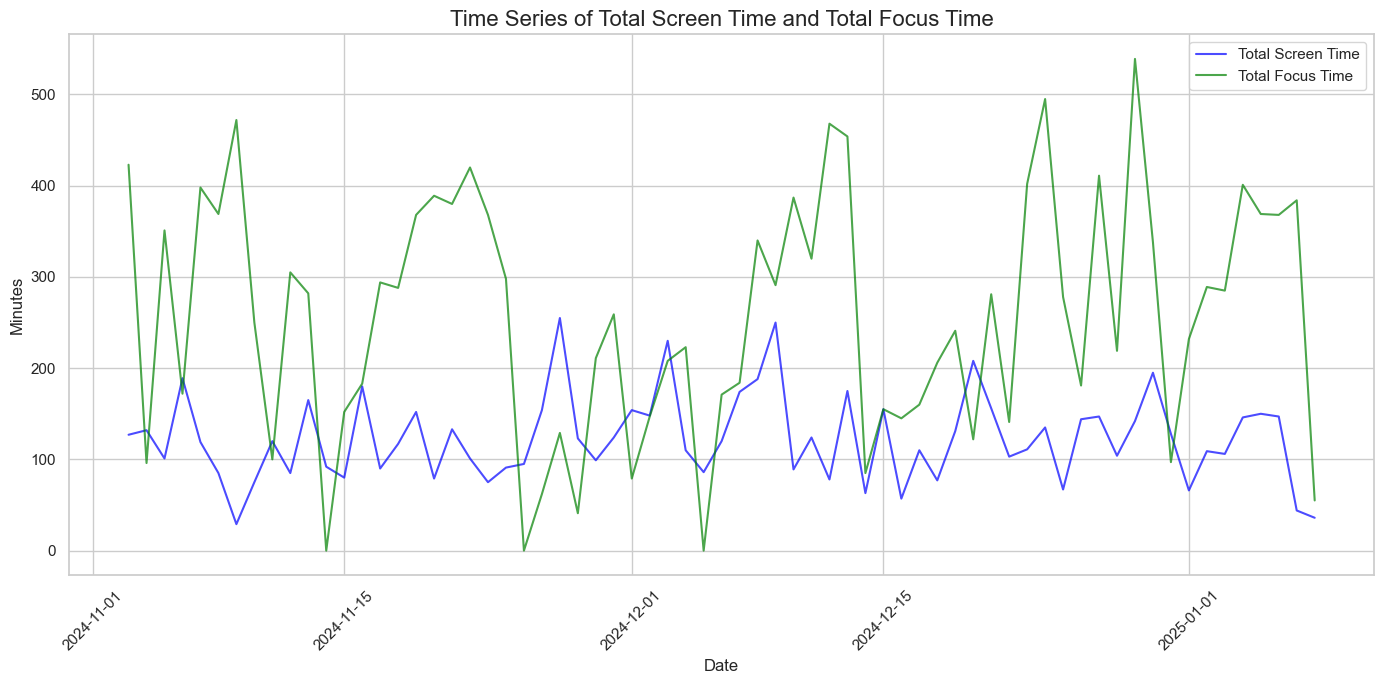

In [17]:

import matplotlib.dates as mdates

# Plot Total Screen Time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['TotalScreenTime'], label='Total Screen Time', color='blue')
plt.title("Time Series of Total Screen Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Minutes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

# Plot Total Focus Time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['TotalFocusTime(mins)'], label='Total Focus Time', color='green')
plt.title("Time Series of Total Focus Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Minutes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()

# Plot Combined Time Series for Screen Time and Focus Time
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['TotalScreenTime'], label='Total Screen Time', color='blue', alpha=0.7)
plt.plot(merged_data['Date'], merged_data['TotalFocusTime(mins)'], label='Total Focus Time', color='green', alpha=0.7)
plt.title("Time Series of Total Screen Time and Total Focus Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Minutes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.tight_layout()
plt.show()


# Title: Refined Correlation Analysis Between Key Variables

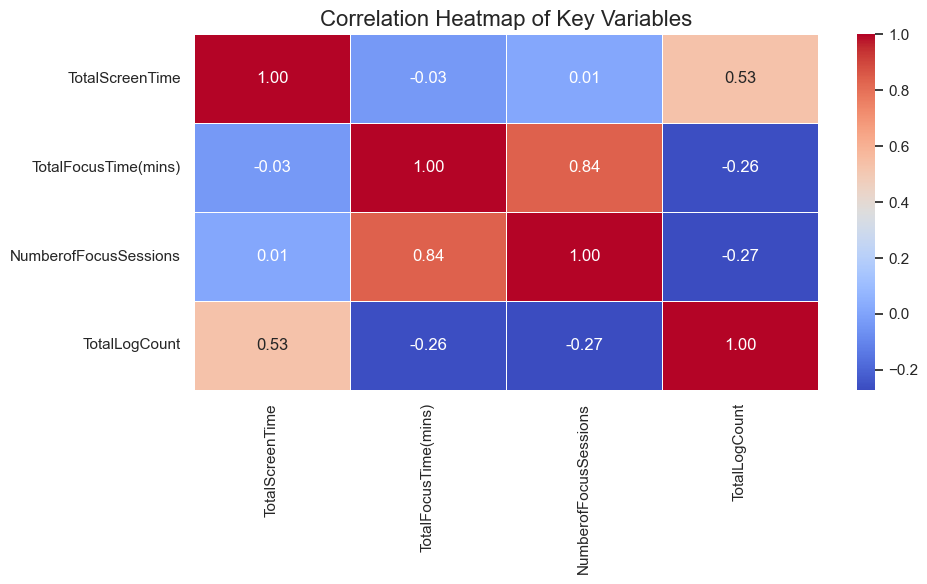

In [18]:
# Title: Refined Correlation Analysis Between Key Variables

# Select key columns for correlation analysis
correlation_data = merged_data[['TotalScreenTime', 'TotalFocusTime(mins)', 
                                'NumberofFocusSessions', 'TotalLogCount']]

# Compute the refined correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Key Variables", fontsize=16)
plt.tight_layout()
plt.show()


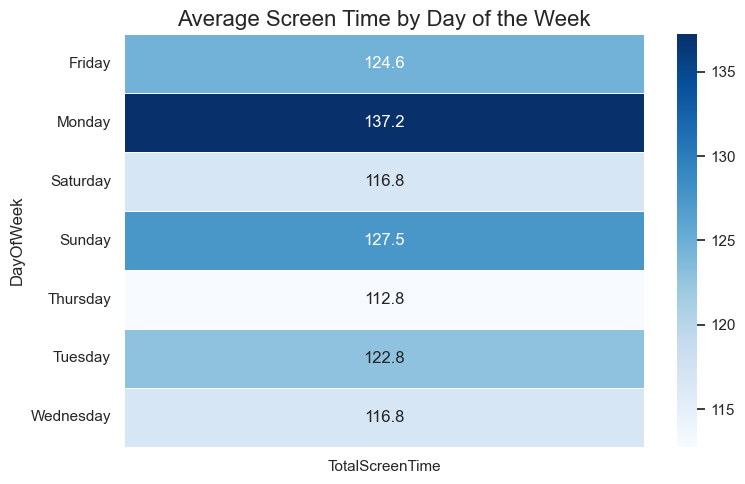

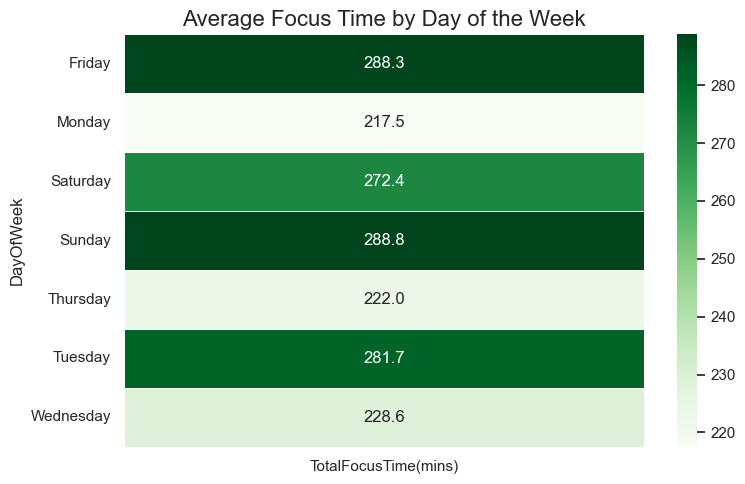

In [15]:
# Title: Weekly Patterns of Screen Time and Focus Time

# Create a new column for the day of the week
merged_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

# Pivot data for heatmap visualization
pivot_screen_time = merged_data.pivot_table(values='TotalScreenTime', index='DayOfWeek', aggfunc='mean')
pivot_focus_time = merged_data.pivot_table(values='TotalFocusTime(mins)', index='DayOfWeek', aggfunc='mean')

# Plot Heatmap for Screen Time
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_screen_time, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)
plt.title("Average Screen Time by Day of the Week", fontsize=16)
plt.tight_layout()
plt.show()

# Plot Heatmap for Focus Time
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_focus_time, annot=True, fmt=".1f", cmap="Greens", linewidths=0.5)
plt.title("Average Focus Time by Day of the Week", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
# Title: Feature Engineering - Focus Efficiency

# Create FocusEfficiency as Total Focus Time divided by Total Log Count
merged_data['FocusEfficiency'] = merged_data['TotalFocusTime(mins)'] / merged_data['TotalLogCount']

# Display the first few rows with the new feature
display(merged_data[['Date', 'TotalFocusTime(mins)', 'TotalLogCount', 'FocusEfficiency']]
        .head(10)
        .style.set_caption("Focus Efficiency Feature").background_gradient(cmap="YlGn"))


,Date,TotalFocusTime(mins),TotalLogCount,FocusEfficiency
0,2024-11-03 00:00:00,423,11,38.454545
1,2024-11-04 00:00:00,96,17,5.647059
2,2024-11-05 00:00:00,351,9,39.000000
3,2024-11-06 00:00:00,172,17,10.117647
4,2024-11-07 00:00:00,398,12,33.166667
5,2024-11-08 00:00:00,369,9,41.000000
6,2024-11-09 00:00:00,472,3,157.333333
7,2024-11-10 00:00:00,250,9,27.777778
8,2024-11-11 00:00:00,100,15,6.666667
9,2024-11-12 00:00:00,305,11,27.727273
